# Logistic Regression Lab

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('advertising.csv')

print(df.info())
print(df.head())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB
None
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


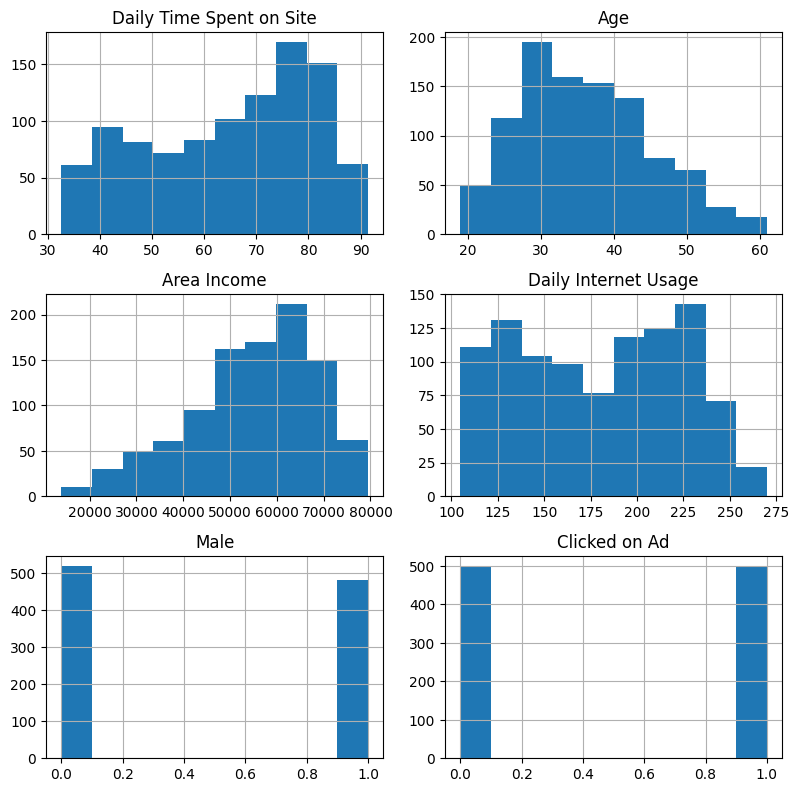

In [3]:
df.hist(figsize=(8,8))
plt.tight_layout(pad=1.0)
plt.show()

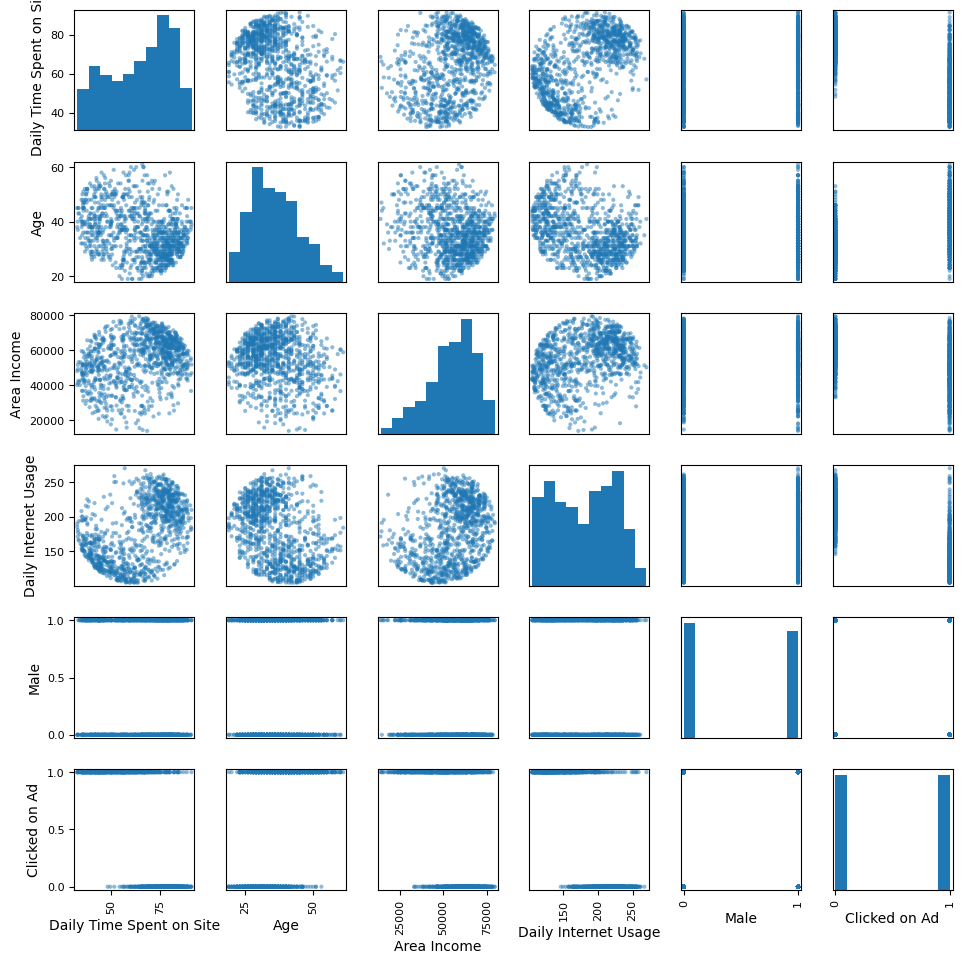

In [4]:
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.tight_layout(pad=2.0)
plt.show()

## Decide Feature Management

**Numerical**:

- `Daily Time Spent on Site`: Information time spent on site. (minutes).
- `Age`: Age of Users
- `Area Income`: Area Income
- `Daily Internet Usage`: Minutes of navegation in Internet.
- `Male`: 0 --> Female 1 --> Male

**Categorical**:

- `Ad Topic Line`: Text variable that doesn't give relevant information.
- `City`: Remove. I will use country.
- `Country`: Target Enconding.
- `Timestamp`: Remove.


**Training Dataset**:
- `Daily Time Spent On Site`: Standarized
- `Age`: Standarized
- `Area Income`: Standarized
- `Daily Internet Usage`: Standarized
- `Male`
- `Country`: Target Encoding

- `Click on Ad`: Target

In [5]:
df = df.drop(columns=['Ad Topic Line', 'City', 'Timestamp'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Country                   1000 non-null   object 
 6   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 54.8+ KB
None


In [6]:
# Transformations

from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Target Encoding (Country)
country_means = df.groupby('Country')['Clicked on Ad'].mean()
df['Country'] = df['Country'].map(country_means)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Country                   1000 non-null   float64
 6   Clicked on Ad             1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB
None


In [7]:
from sklearn.model_selection import train_test_split

x, y = df.drop(["Clicked on Ad"], axis=1), df[["Clicked on Ad"]]

print(x.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1000, 6) (1000, 1)
(850, 6) (850, 1)
(150, 6) (150, 1)


In [8]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)

c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Model score:  0.9741176470588235
Confusion Matrix:
 [[423   9]
 [ 13 405]]
Sensitivity:  0.9688995215311005
Specificity:  0.9791666666666666


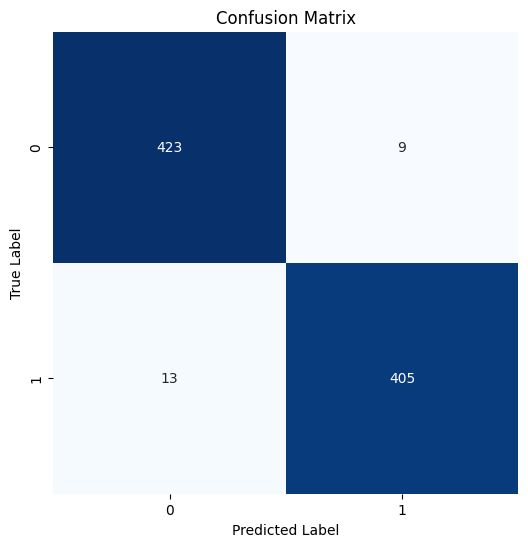

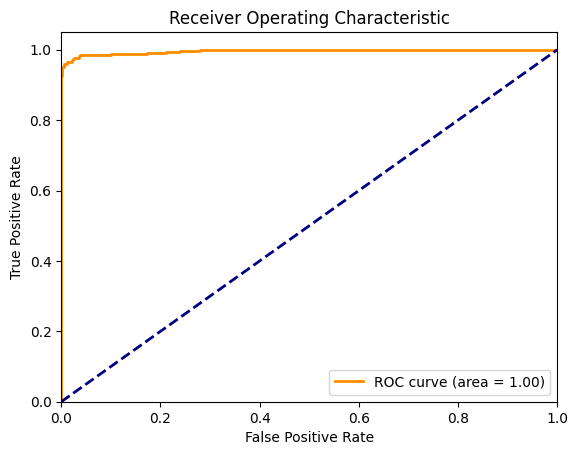

In [9]:
print("Model score: ", lr_model.score(x_train, y_train))

y_pred = lr_model.predict(x_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", cm)

# Sensitivity and Specificity
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)


# Plot of Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## ROC Curve
from sklearn.metrics import roc_curve, auc
y_prob = lr_model.predict_proba(x_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Training Dataset

No Scale Values and without categorical Values:

- Score: 0.9
- False Positive: 29
- False Negative: 56
- Sensitivity: 0.8660287081339713
- Specificity: 0.9328703703703703
- ROC Curve: 0.96

Scale Values and without Categorical Values: 

- Score: 0.971764705882353
- False Positive: 9
- False Negative: 15
- Sensivity: 0.9641148325358851
- Specificity: 0.9791666666666666
- ROC Curve: 0.99


Scale Values and Country as Categorical Value (Target Encoding):

- Score: 0.9741176470588235
- False Positive: 9
- False Negative: 13
- Sensivity: 0.9688995215311005
- Specificity: 0.9791666666666666
- ROC Curve: 1.00



## Test Dataset

Model score:  0.9533333333333334
Confusion Matrix:
 [[65  3]
 [ 4 78]]
Sensitivity:  0.9512195121951219
Specificity:  0.9558823529411765


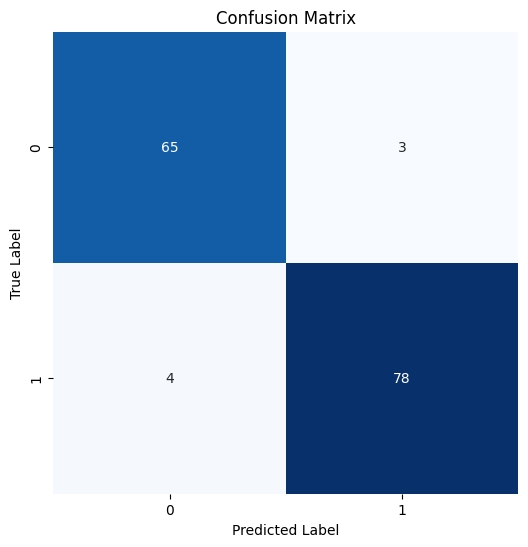

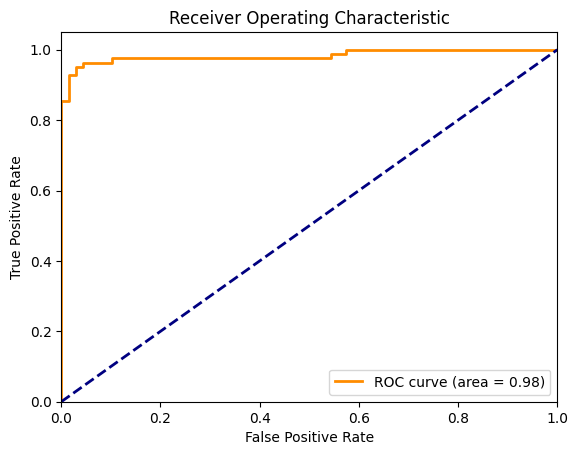

In [10]:
print("Model score: ", lr_model.score(x_test, y_test))

y_pred = lr_model.predict(x_test)

cm_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_test)

# Sensitivity and Specificity
TP = cm_test[1, 1]
TN = cm_test[0, 0]
FP = cm_test[0, 1]
FN = cm_test[1, 0]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)


# Plot of Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## ROC Curve
from sklearn.metrics import roc_curve, auc
y_prob = lr_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Test Evaluation

Scale Values and Country as Categorical Value (Target Encoding):

- Score: 0.9533333333333334
- False Positive: 3
- False Negative: 4
- Sensivity: 0.9512195121951219
- Specificity: 0.9558823529411765
- ROC Curve: 0.98

# Conclusion

I saw that without categorical values, the evaluation of the training dataset is better. Otherwise, the test dataset has a worse evaluation. 

It seems that the training dataset learn better with country as target encoding, but the test dataset has a better evaluation without categorical features.